<a href="https://colab.research.google.com/github/yudahendriawan/google-colab-projects/blob/main/aksara_jawa_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Javanese Script Image Classification

In [ ]:
import tensorflow as tf
import logging, os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = '/Users/yudahendriawan/Downloads/Aksara Jawa Images/v3 copy/v3/train'

In [ ]:
aksara_jawa_labels = ['ba','ca','da','dha','ga','ha','ja','ka','la','ma','na','nga','nya','pa','ra','sa','ta','tha','wa','ya']

for i in aksara_jawa_labels:
    print(f'total {i} images :', len(os.listdir(f'{path}/{i}')))

total ba images : 101
total ca images : 101
total da images : 101
total dha images : 101
total ga images : 101
total ha images : 101
total ja images : 101
total ka images : 101
total la images : 101
total ma images : 101
total na images : 101
total nga images : 101
total nya images : 101
total pa images : 101
total ra images : 101
total sa images : 101
total ta images : 101
total tha images : 101
total wa images : 101
total ya images : 100


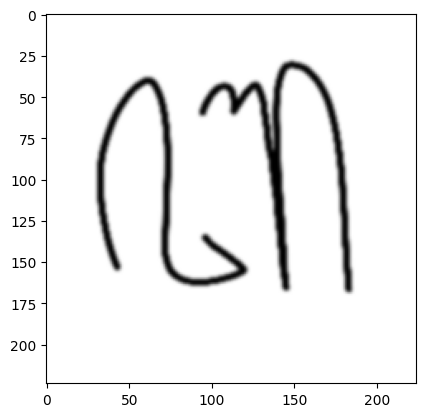

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img(f'{path}/ba/ba17.meki.b.png')
imgplot = plt.imshow(img)

In [ ]:
img_pixel = 64

train_dir = path
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_pixel, img_pixel),
    batch_size=8,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_pixel, img_pixel),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 1600 images belonging to 20 classes.
Found 400 images belonging to 20 classes.


In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(img_pixel, img_pixel, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(20, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85):
      print("\nAccuracy model telah mencapai 85% !!")
      self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=[callbacks]
                    )

Epoch 1/100
200/200 [==============================] - 6s 27ms/step - loss: 3.0286 - accuracy: 0.0469 - val_loss: 2.9953 - val_accuracy: 0.0425
Epoch 2/100
200/200 [==============================] - 5s 26ms/step - loss: 3.0057 - accuracy: 0.0538 - val_loss: 2.9954 - val_accuracy: 0.0575
Epoch 3/100
200/200 [==============================] - 5s 27ms/step - loss: 3.0014 - accuracy: 0.0375 - val_loss: 2.9950 - val_accuracy: 0.0600
Epoch 4/100
200/200 [==============================] - 5s 25ms/step - loss: 2.9975 - accuracy: 0.0456 - val_loss: 2.9951 - val_accuracy: 0.0550
Epoch 5/100
200/200 [==============================] - 5s 27ms/step - loss: 2.9999 - accuracy: 0.0494 - val_loss: 2.9956 - val_accuracy: 0.0500
Epoch 6/100
200/200 [==============================] - 5s 26ms/step - loss: 2.9986 - accuracy: 0.0481 - val_loss: 2.9950 - val_accuracy: 0.0525
Epoch 7/100
200/200 [==============================] - 5s 24ms/step - loss: 2.9946 - accuracy: 0.0575 - val_loss: 2.9951 - val_accuracy:

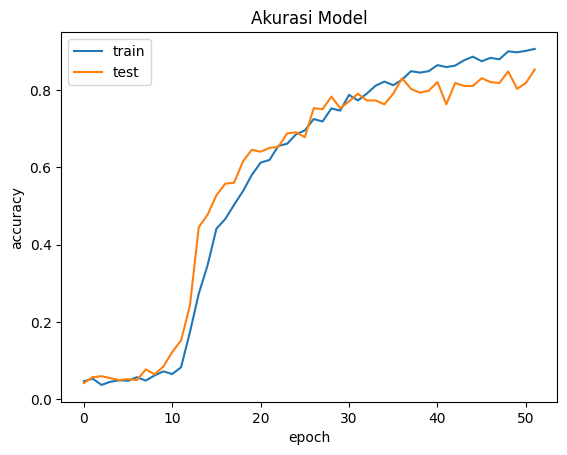

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

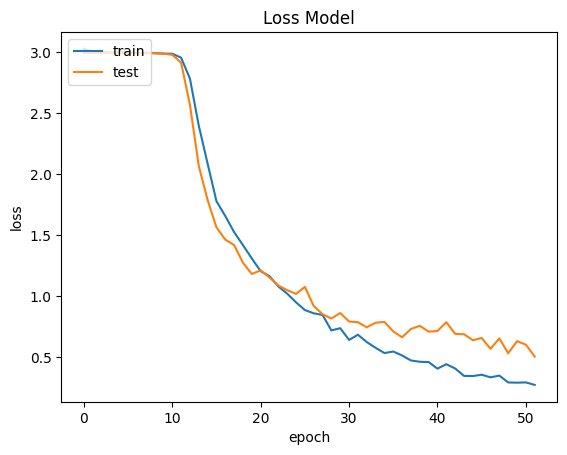

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

converter = tf.lite.TFLiteConverter.from_saved_model("saved_model/")
tflite_model = converter.convert()

with tf.io.gfile.GFile('aksara_jawa_classification.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets
2024-02-02 10:22:45.855061: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-02 10:22:45.855210: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-02-02 10:22:45.856243: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: saved_model/
2024-02-02 10:22:45.857607: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-02-02 10:22:45.857611: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: saved_model/
2024-02-02 10:22:45.863840: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-02-02 10:22:45.979763: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: saved_model/
2024-02-02 10:22:45.993586: I tensorflow/cc/saved_model/loader.cc:316] SavedModel load for tags { 